In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from lib import jsoncorpus, datastuff, analysis
import gensim
import traceback
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
import sklearn.preprocessing
import sklearn.cross_validation
import sklearn.ensemble
import sklearn.svm
import sklearn.decomposition
import sklearn.neighbors
from lib.scikitComponents import *
import itertools
import collections
from lib.scikitComponents import pipelines
import scipy.stats

## Data preprocessing

In [157]:
# Load in the previously created corpus and dictionary of scraped sites
Datas = collections.namedtuple('Datas', ['dictionary', 'corpus', 'meta_corpus', 'dmoz_data'])
unstemmed = Datas(*jsoncorpus.load_or_create('docs/sites.jl'))
stemmed = Datas(*jsoncorpus.load_or_create('docs/sites.jl', stemmed=True, prefix="stemmed_"))

Done.
Done.


In [158]:
def preprocess(data):
    # Set up array of input data
    X = zip(list(data.corpus), list(data.meta_corpus), data.dmoz_data['meta'])
    # Link topics to URLs
    meta = list(zip(data.dmoz_data['urls'], data.dmoz_data['dmoz_categories']))
    # Encode class labels
    classes, top_categories, dmoz_encoder = datastuff.encode_dmoz_categories(data.dmoz_data['dmoz_categories'])
    return (X, meta, classes, top_categories, dmoz_encoder)
X, meta, classes, top_categories, dmoz_encoder = preprocess(stemmed)

In [106]:
verbosity = 3

## Boxplots for different representation combinations

In [376]:
clfs = np.array([
    pipelines.make_classifier(dictionary, body_kind=None, meta_kind='count', classifier='svc'),
    pipelines.make_classifier(dictionary, body_kind='lda', meta_kind='count', classifier='svc'),
    pipelines.make_classifier(dictionary, body_kind='lda', meta_kind=None, classifier = 'svc'),
    pipelines.make_classifier(dictionary, body_kind='tfidf', meta_kind=None, classifier = 'svc'),
    pipelines.make_classifier(dictionary, body_kind=None, meta_kind='tfidf', classifier = 'svc'),
    pipelines.make_classifier(dictionary, body_kind='tfidf', meta_kind='tfidf', classifier = 'svc')
])

In [377]:
scores = [
    sklearn.cross_validation.cross_val_score(clf, X, classes, cv=5, verbose=verbosity, scoring='f1_weighted')
    for clf in clfs]

[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.391314 -   0.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.373059 -   0.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.367752 -   0.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.416144 -   0.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.338891 -   0.5s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.425612 -  13.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.402087 -  13.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.449397 -  13.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.459577 -  14.1s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.374320 -  12.7s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   13.8s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.316012 -  12.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.294763 -  12.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.340622 -  16.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.383509 -  13.4s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.364499 -  12.3s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   13.1s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.541130 -   1.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.542484 -   2.4s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.552980 -   2.3s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.506690 -   1.7s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.481371 -   1.6s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.464761 -   0.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.449172 -   0.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.495326 -   0.4s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.487274 -   0.4s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.373428 -   0.5s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.551907 -   2.1s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.554505 -   2.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.603026 -   2.2s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.563891 -   2.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.495385 -   2.5s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.7s finished


## Stemming comparison

In [159]:
X_s, meta_s, classes_s, top_categories_s, dmoz_encoder_s = preprocess(stemmed)
X_u, meta_u, classes_u, top_categories_u, dmoz_encoder_u = preprocess(unstemmed)

In [184]:
clf_s = pipelines.make_classifier(stemmed.dictionary, body_kind='tfidf', meta_kind='tfidf', classifier = 'svc')
clf_u = pipelines.make_classifier(unstemmed.dictionary, body_kind='tfidf', meta_kind='tfidf', classifier = 'svc')
clf_s.name = "stemmed " + clf_s.name
score_s = sklearn.cross_validation.cross_val_score(clf_s, X_s, classes_s, cv=5, verbose=verbosity, scoring='f1_weighted')
score_u = sklearn.cross_validation.cross_val_score(clf_u, X_u, classes_u, cv=5, verbose=verbosity, scoring='f1_weighted')

[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.551907 -   2.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.554505 -   2.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.603026 -   2.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.563891 -   2.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.495385 -   2.6s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.1s finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.495742 -   3.3s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.526985 -   3.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.558660 -   4.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.528004 -   2.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.465684 -   2.7s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.8s finished


In [244]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)

[TfIdf(body) SVM] vs [TfIdf(meta) SVM]: p-value = 0.028779631012%
[TfIdf(body) SVM] vs [TfIdf(body) TfIdf(meta) SVM]: p-value = 0.2255089187%
[TfIdf(meta) SVM] vs [TfIdf(body) TfIdf(meta) SVM]: p-value = 0.0076387655981%


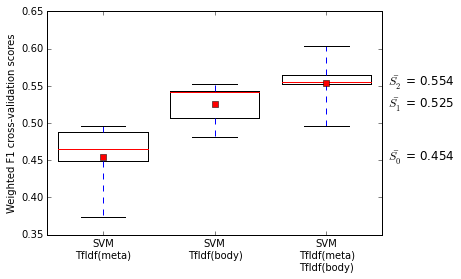

In [427]:
k = 3
makeboxplot(scores[-k:], clfs[-k:])
print_pvalue([c.name for c in clfs[-k:]], scores[-k:])
plt.savefig('box_meta_or_body.pdf', bbox_inches='tight')

[Stemming] vs [Not]: p-value = 13.6963300709%


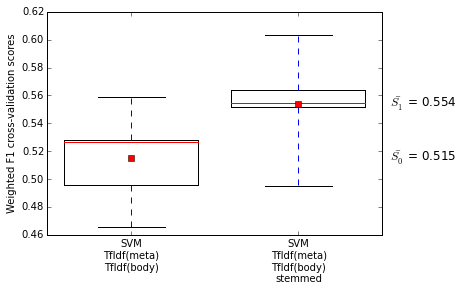

In [422]:
makeboxplot([score_s, score_u], [clf_s, clf_u], )
print_pvalue(["Stemming", "Not"], [score_s, score_u])
plt.savefig('box_stemming.pdf', bbox_inches='tight')

In [714]:
cclfs = [
    pipelines.make_classifier(dictionary, body_kind='lda', meta_kind=None, classifier = 'nb'),
    pipelines.make_classifier(dictionary, body_kind='tfidf', meta_kind=None, classifier = 'nb'),
    pipelines.make_classifier(dictionary, body_kind='count', meta_kind=None, classifier = 'nb'),
    pipelines.make_classifier(dictionary, body_kind='lda', meta_kind=None, classifier = 'svc'),
    pipelines.make_classifier(dictionary, body_kind='tfidf', meta_kind=None, classifier = 'svc'),
    pipelines.make_classifier(dictionary, body_kind='count', meta_kind=None, classifier = 'svc'),
    pipelines.make_classifier(dictionary, body_kind='lda', meta_kind=None, classifier = 'trees'),
    pipelines.make_classifier(dictionary, body_kind='tfidf', meta_kind=None, classifier = 'trees'),
    pipelines.make_classifier(dictionary, body_kind='count', meta_kind=None, classifier = 'trees'),
]


In [520]:
cscores = [sklearn.cross_validation.cross_val_score(clf, X, classes, cv=5, verbose=verbosity, scoring='f1_weighted') 
 for clf in cclfs]

[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.096380 -  11.3s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.122260 -  10.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.125616 -  11.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.118265 -  11.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.117804 -  11.3s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   11.4s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   56.5s finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.256024 -   1.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.292563 -   1.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.300041 -   1.4s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.282226 -   1.4s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.279868 -   1.3s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.1s finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.397047 -   0.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.414197 -   0.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.511576 -   0.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.465148 -   0.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.459354 -   0.5s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.309247 -  11.1s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.230713 -  11.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.338467 -  10.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.312566 -  11.7s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.335355 -  11.6s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   11.2s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   56.8s finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.541130 -   1.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.542484 -   1.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.552980 -   1.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.506690 -   1.7s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.481371 -   1.6s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.0s finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.442999 -   0.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.436152 -   0.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.469145 -   0.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.396836 -   0.7s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.392822 -   0.7s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.2s finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.329366 -  11.4s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.357229 -  11.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.354264 -  11.4s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.384972 -  11.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.376748 -  11.6s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   11.5s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   58.4s finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.384625 -  12.2s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.403296 -  12.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.474672 -  11.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.393380 -  11.5s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.394320 -  11.8s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   12.2s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   59.6s finished



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.369425 -   6.3s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.370441 -   7.3s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.440937 -   6.9s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.369163 -   6.3s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.378791 -   6.2s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   33.1s finished


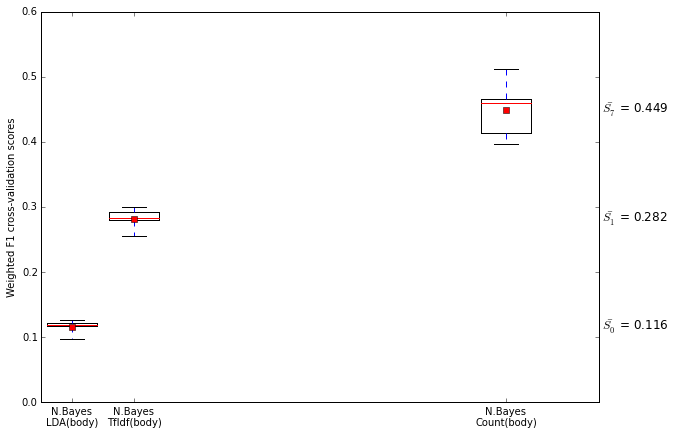

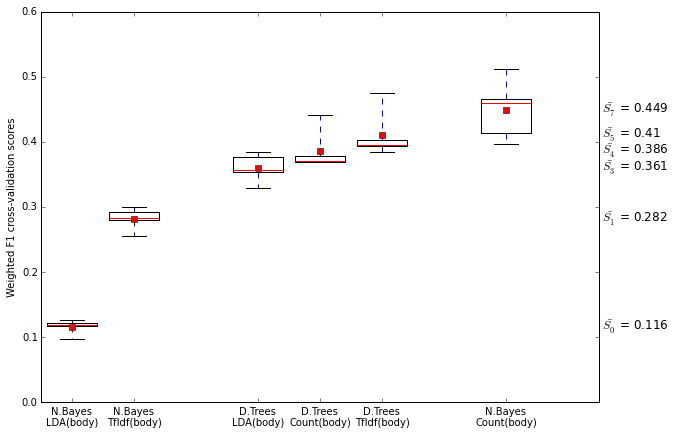

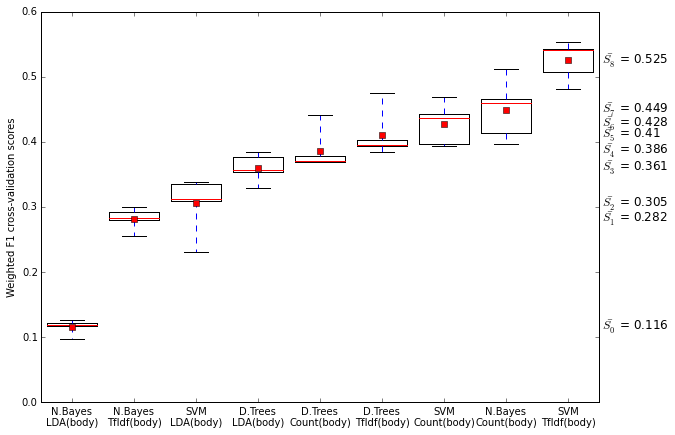

In [723]:
def newline_name(name):
    return "\n".join(reversed(name.split()))

def makeboxplot(scores, clfs, ylabel='Weighted F1 cross-validation scores', figsize=None, inds=None, maxp=None):
    inds = inds or range(len(clfs))
    sortinds = np.argsort(np.mean(np.array(scores).T, axis=0))
    scores_sorted = np.array(scores)[sortinds, :].T[:, inds]
    labels_sorted = np.array([newline_name(clf.name) for clf in clfs])[sortinds][inds]
    
    
    if figsize:
        plt.figure(figsize=figsize)
    
    box_params = dict(showmeans=True,widths=0.8, flierprops=dict(marker='o'), patch_artist=True)
    
    maxp = maxp or max(positions)+1
    box = plt.boxplot(scores_sorted, labels = labels_sorted, whis=10, positions = np.array(inds)+1, **box_params)
    plt.ylabel(ylabel)
    plt.xlim((0.5, maxp+0.5))
    for i, s in enumerate(scores_sorted.T):
        text = "$\\bar{{S_{}}}$ = {:.3}".format(inds[i], np.mean(s))
        tx = maxp+0.55
        ty = np.mean(s)
        plt.text(tx, ty, text, va='center', fontsize=12)
        props = dict(color='gray', shrink=0.05, frac=0.12/float
                     (len(clfs) - i), width=0.5, headwidth=3)
    
def print_pvalue(names, scores):
    for a, b in itertools.combinations(zip(names, scores), 2):
        aname, ascore = a
        bname, bscore = b
        pvalue = scipy.stats.ttest_ind(ascore, bscore, equal_var=False)[1]
        print "[{}] vs [{}]: p-value = {}%".format(aname, bname, pvalue)

inds = [0, 1, 7]
makeboxplot(np.array(cscores), np.array(cclfs), figsize = (10, 7), inds = inds, maxp=9)
plt.savefig('box_full_1.pdf', bbox_inches='tight')
inds = inds + [3, 4, 5]
makeboxplot(np.array(cscores), np.array(cclfs), figsize = (10, 7), inds = inds, maxp=9)
plt.savefig('box_full_2.pdf', bbox_inches='tight')
inds = inds + [2, 6, 8]
makeboxplot(np.array(cscores), np.array(cclfs), figsize = (10, 7), inds = inds, maxp=9)
plt.savefig('box_full_3.pdf', bbox_inches='tight')



In [530]:
cclfs[4].fit(X, classes)


Pipeline(steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('body', Pipeline(steps=[('selector', ItemPicker(index=0)), ('feature', Pipeline(steps=[('tfidf', TFIDFModel(id2word=None)), ('matrix', TopicMatrixBuilder(keep_all=True, num_topics=13021, topic_min_members=0))]))]))],
       transforme...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [585]:
words = []
for c in range(14):
    weights = cclfs[4].steps[1][1].coef_[c]
    inds = np.argsort(weights)[::-1]
    best = [dictionary[i] for i in inds][:9]
    words.append(best)
    print "\\item \\textbf{{{}}}: {}".format(dmoz_encoder.inverse_transform(c), ", ".join(best))
#np.array(words)

\item \textbf{arts}: art, artist, award, design, costum, font, film, tattoo, literari
\item \textbf{business}: busi, compani, product, investor, drill, sustain, financi, industri, nanni
\item \textbf{computers}: comput, file, usenet, softwar, bb, algorithm, robot, window, emul
\item \textbf{games}: game, dice, puzzl, rpg, wargam, miniatur, stack, diplomaci, parti
\item \textbf{health}: health, pharmaci, addict, diseas, drug, osha, age, veterinari, care
\item \textbf{home}: garden, diy, apart, toy, consum, clean, move, kitchen, plant
\item \textbf{kids and teens}: kid, parent, teacher, clipart, fun, homeschool, children, disney, manor
\item \textbf{news}: newspap, netanyahu, weather, obama, news, radio, iran, polit, forecast
\item \textbf{recreation}: hike, lock, climb, bird, cave, travel, camp, pet, whip
\item \textbf{reference}: librari, knot, dictionari, isbn, thesauru, biographi, word, encyclopedia, answer
\item \textbf{regional}: popul, countri, cia, island, nat, territori, geograp

In [548]:
dictionary[4]

u'yellow'